# **Importing required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

# **Generating Dataset**

In [2]:
data = make_blobs(n_samples = 800, centers = 3, n_features = 2, cluster_std = 1.5, shuffle = True, random_state = 50)
data

(array([[-6.59434748, -2.4795557 ],
        [-1.44233247, 10.09901821],
        [-0.5009282 , -5.31356688],
        ...,
        [-7.4583852 , -2.91591304],
        [-1.41755412,  9.83551745],
        [-6.44088807, -1.65605727]]),
 array([1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0,
        1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2,
        0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2,
        0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2,
        2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2,
        0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1,
        2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1,
        2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
        0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
        0, 2, 1, 2, 1, 2, 2, 

In [3]:
pts = data[0]
pts

array([[-6.59434748, -2.4795557 ],
       [-1.44233247, 10.09901821],
       [-0.5009282 , -5.31356688],
       ...,
       [-7.4583852 , -2.91591304],
       [-1.41755412,  9.83551745],
       [-6.44088807, -1.65605727]])

# **Plotting and Viewing my Data**

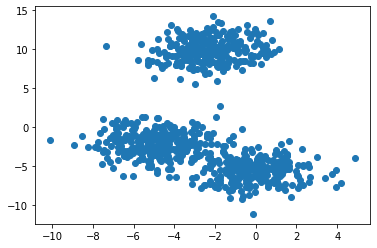

In [4]:
plt.scatter(data[0][:,0], data[0][:,1])

# **Defining the x and y co-ordinates in pandas Dataframe**

In [5]:
df = pd.DataFrame({
    'x': data[0][:,0],
    'y': data[0][:,1]
})

In [6]:
df

,x,y
0,-6.594347,-2.479556
1,-1.442332,10.099018
2,-0.500928,-5.313567
3,-3.654380,9.459896
4,-0.444785,-6.298762
...,...,...
795,-6.336402,-3.117507
796,1.178076,-7.697622
797,-7.458385,-2.915913
798,-1.417554,9.835517


In [7]:
df.describe()

,x,y
count,800.000000,800.000000
mean,-2.439103,0.746014
std,2.456023,6.787830
min,-10.084702,-11.153173
25%,-4.301530,-4.726922
50%,-2.272177,-1.993031
75%,-0.636460,8.626402
max,4.863146,14.230083


# **Defining the initial Cluster Centroids and plotting them**

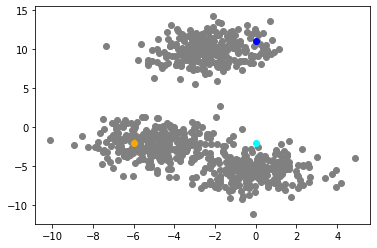

In [8]:
np.random.seed(400)
n_clusters = 3
centroids = {
    i+1 : [int(data[0][np.random.randint(0,799),0]), int(data[0][np.random.randint(0,799),1])]
    for i in range(n_clusters)
}

figure = plt.figure(figsize=(6,4))
plt.scatter(df['x'], df['y'], color = 'gray')
colormap = {1 : 'blue', 2 : 'orange', 3 : 'cyan'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color = colormap[i])
plt.show()

# **Cluster Assignment Step**


**The algorithm goes through each of the examples and depending on whether they are closer to the Orange, Blue or Cyan centroid, it assigns each of the data points to one of the cluster centroids**

In [9]:
centroids

{1: [0, 11], 2: [-6, -2], 3: [0, -2]}

In [10]:
def cluster_assignment(X, centroids, k):
  clusters = {}
  # Set the range for value of k(number of cluster centroids)
  for i in range(k):
    clusters[i] = []
  # Setting the plot points using dataframe (X) and the norm 
  for i in X:
    # Set up list of euclidian distance and iterate 
    euclidian_dist = []
    for j in range(k):
      euclidian_dist.append(np.linalg.norm(i - centroids[j]))
    # Append the cluster of data (index of minimum euclidian distance) to the dictionary
    clusters[euclidian_dist.index(min(euclidian_dist))].append(i)
  return clusters

# **Move Centroid Step**

**The cluster centroids are taken and moved to the average of their corresponding data points. Specifically, we are going to compute the mean of the points’ location for each of the two clusters already formed and move the centroids to their respective cluster means.**

In [11]:
def move_centroid(centroid, clusters, k):
  for i in range(k):
    # Finds the average of the cluster at the particular index
    centroids[i] = np.average(clusters[i], axis=0)
  return centroids

# **Method for Visualizing the Clusters**

In [12]:
def view_clusters(centroids, clusters, k):
  colors = ['blue' ,'orange', 'cyan']
  plt.figure(figsize = (6, 4)) 
  for i in range(k):
    for cluster in clusters[i]:
        plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
    plt.scatter(centroids[i][0], centroids[i][1], c='gray', s=200)

# **Implementing the K-Means Clustering on the Data**

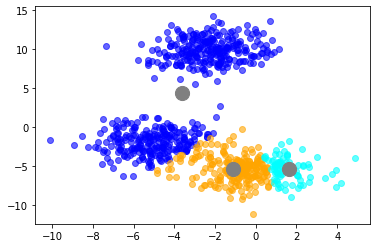

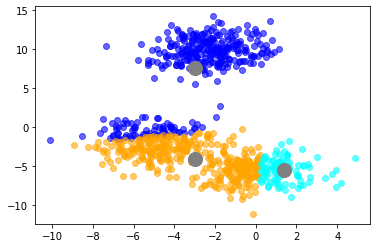

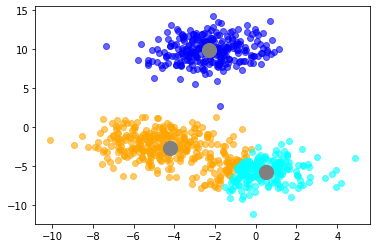

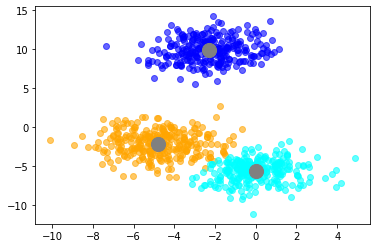

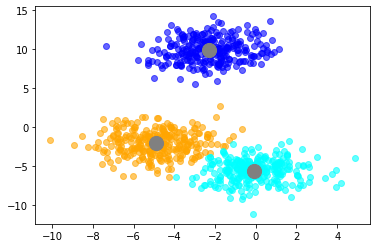

In [14]:
X = np.array(df[['x', 'y']])
centroids = {}
iter = 5
for i in range(n_clusters):
  centroids[i] = X[i*200]
for i in range(iter):        
  clusters = cluster_assignment(X, centroids, n_clusters)
  centroids = move_centroid(centroids, clusters, n_clusters)
  view_clusters(centroids, clusters, n_clusters)

# **The data points have been separated into 3 clusters**